# Predicting and Understanding Future Rainfall Changes Using Statistical Learning
For: Georgia Institute of Technology Practical Math and Coding Course, Fall 2023

Put together by: Meghana Ranganathan

In [ ]:
# Import Things
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline, UnivariateSpline
from scipy.optimize import curve_fit

### Define Initial Data
Say we have observations over 20 years of the rainfall system. Here, we get our "observations" of three predictors: mean land temperature, Nino3.4 Index (a measure of sea-surface temperature), and mean sea level pressure.

In [ ]:
xis = np.linspace(0, 20, 20 * 12) # define timespan

Define and plot temperature observations over the 20 years; temperature increases slightly (with noise) over 20 years:

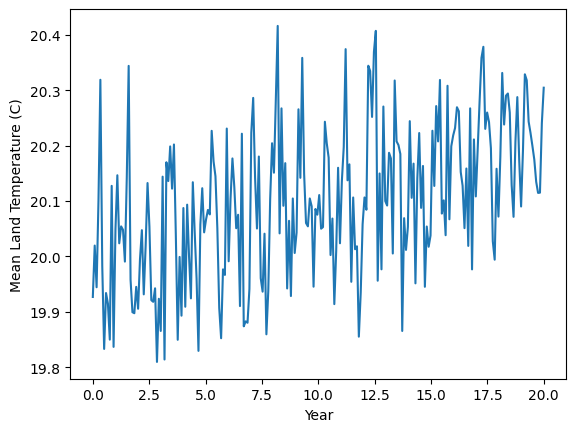

In [ ]:
x_temp = 20 + 0.01 * xis + 0.1 * np.sin(2 * np.pi * xis) + 0.1 * np.random.randn(len(xis))

plt.figure(1)
plt.plot(xis, x_temp)
plt.xlabel('Year')
plt.ylabel('Mean Land Temperature (C)')
plt.show()

Define and plot Nino3.4 observations over 20 years; Nino3.4 index varies over timescales of ~7 years:

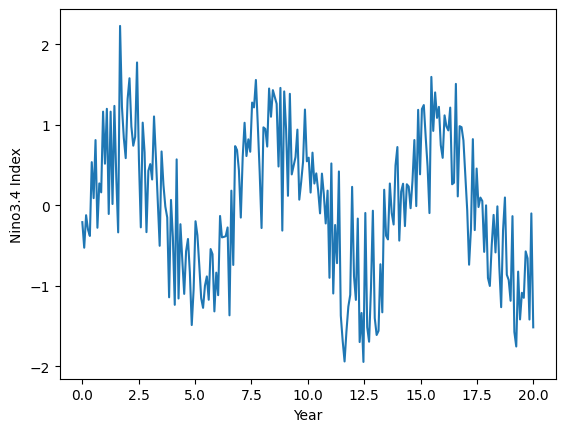

In [ ]:
x_nino = np.sin(2 * np.pi * xis / 7) + 0.5 * np.random.randn(len(xis))
plt.figure(2)
plt.plot(xis, x_nino)
plt.xlabel('Year')
plt.ylabel('Nino3.4 Index')
plt.show()

Define and plot sea level pressure observations over 20 years:

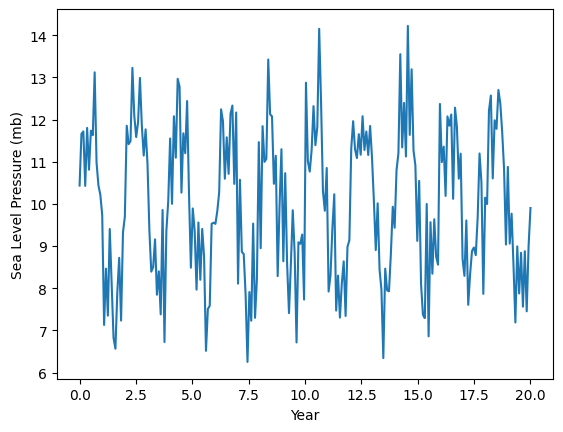

In [ ]:
x_slp = 10 + 0.001 * xis + 2 * np.sin(2 * np.pi * xis / 2) + 1 * np.random.randn(len(xis))

plt.figure(3)
plt.plot(xis, x_slp)
plt.xlabel('Year')
plt.ylabel('Sea Level Pressure (mb)')
plt.show()

Now we will create our "response" observations. In reality, these observations will be measurements of a system for which we don't know the underlying equations. Here, to generate these synthetic observations, we'll assume some form of the equation, where mean rainfall can be found as a linear combination of the three predictor variables.

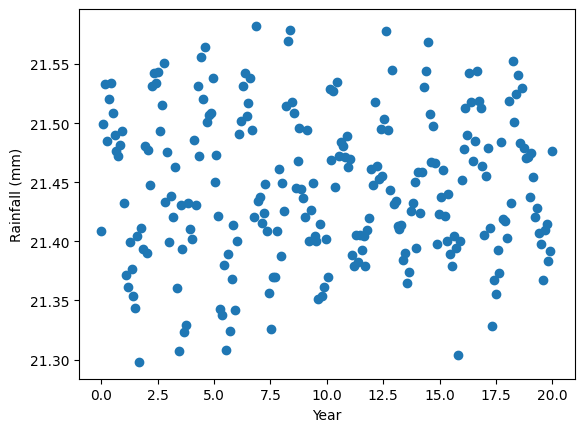

In [ ]:
# Define our observations of the response variable, rainfall
yis = 20 + 0.05432 * x_temp + 0.004546 * x_nino + 0.0354 * x_slp

# Plot observations
plt.figure(4)
plt.scatter(xis, yis)
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.show()

### Linear Regression
We will first try a form of "parametric" statistical learning known as linear regression. In this method, we will assume that the true underlying f function is linear with respect to the predictor variables, which reduces this problem down to a problem of finding parameters of a linear equation.

We will first show a form of "univariate linear regression", in which we are assuming that f is only a function of one variable, in this case land temperature. We know this is not actually the case, but it is common that we may not know all of the underlying predictor variables, so when we do these regressions, we are only doing regressions for some subset of the true predictors.

Do univariate linear regression

In [ ]:
xlr = np.column_stack((np.ones(len(x_temp)), x_temp)) # define the X matrix of predictor variables (in this case, just one, plus a vector of 1's)
ylr = yis # make sure the y vector is oriented properly
b = np.linalg.lstsq(xlr, ylr, rcond=None)[0] # Use the numpy.linalg.lstsq function for the linear regression (matrix inversion)
print(b)

[ 2.14768663e+01 -1.53723678e-03]


Once we have our estimates of the parameters, we can put them back into our assumed linear equation and generate y^, our estimates of the response (in this case, rainfall). The goal, for a good regression, is for y^ to be very close to our observations y.

In [ ]:
yhat = b[0] + b[1] * x_temp

We now want to see how well our linear regression fared. First, let's evaluate whether the relationship between temperature and rainfall is truly linear by plotting rainfall against temperature. Then, we can plot our estimated linear regression on top and see how well our line approximates the data.

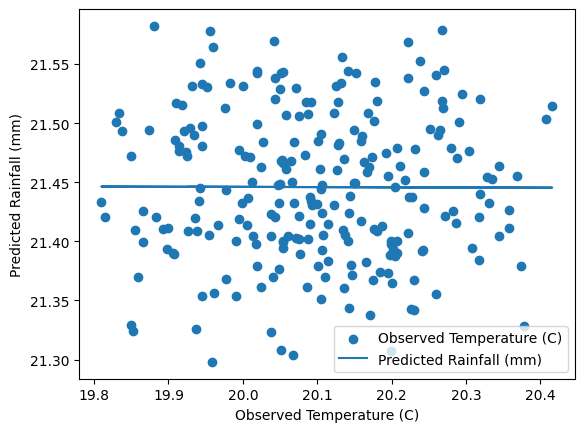

In [ ]:
plt.figure(5)
plt.scatter(x_temp, yis, label='Observed Temperature (C)')
plt.plot(x_temp, yhat, label='Predicted Rainfall (mm)')
plt.xlabel('Observed Temperature (C)')
plt.ylabel('Predicted Rainfall (mm)')
plt.legend()
plt.show()

It's not an obvious fit. Let's see how well we reproduce the observations of rainfall over time.

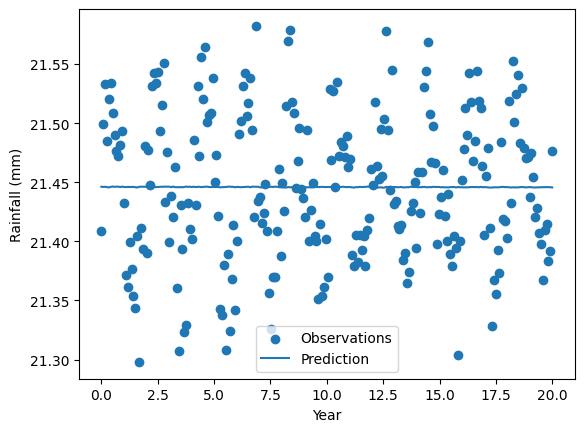

In [ ]:
plt.figure(6)
plt.scatter(xis, yis, label='Observations')
plt.plot(xis, yhat, label='Prediction')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.legend(['Observations', 'Prediction'])
plt.show()

It's not great. We can't reasonably say that this linear model can be used to predict rainfall after the 20 years of observations. This isn't surprising, since we know that temperature is not the only predictor that we need to think about. What if we now include all three variables: temperature, Nino3.4 index, and sea level pressure? Now, we're doing a multivariate regression.

In [ ]:
xlr = np.column_stack((np.ones(len(x_temp)), x_temp, x_nino, x_slp)) # Create the X matrix of predictor variables
ylr = yis # Make sure the y vector is oriented properly
b = np.linalg.lstsq(xlr, ylr, rcond=None)[0] # Use the numpy.linalg.lstsq function for multivariate linear regression (matrix inversion)
print(b)

[ 2.10231328e+01  9.24416208e-03 -1.44387901e-03  2.36816413e-02]


In [ ]:
yhat = b[0] + b[1] * x_temp + b[2] * x_nino + b[3] * x_slp

# plot the estimates against observations to see how well our regression fared
plt.figure(7)
plt.scatter(xis, yis, label='Observations')
plt.plot(xis, yhat, label='Prediction')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.legend(['Observations', 'Prediction'])

Much better! Again, not surprising, since we know that the "true" model is in fact linear, so linear regression would perform quite well. In fact, because this system had very little noise or error, we have produced an almost perfect model. In reality, this is quite hard to do because systems aren't so clean or straightforward.

### What if it's not linear?
Let's complicate the situation. What if the "true" underlying relationship between our predictors and our resposne variable isn't linear. Now, we have rainfall being proportional to the square of mean temperature, rather than linearly proportional. How well does linear regression perform now?

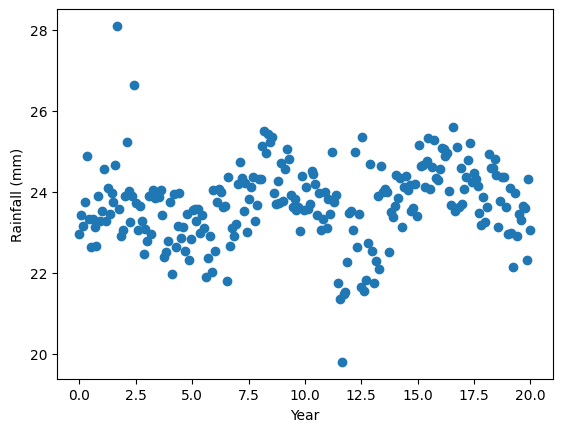

In [ ]:
yis = 0.0001432 * x_temp**4 + 0.4646 * x_nino**3 + 0.00354 * x_slp**2

plt.figure(8)
plt.scatter(xis, yis)
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.show()

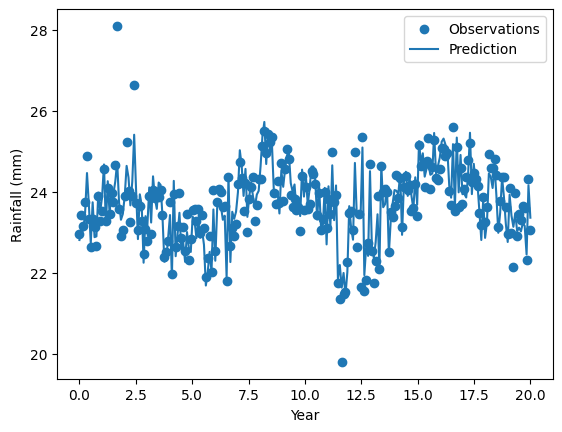

In [ ]:
xlr = np.column_stack((np.ones(len(x_temp)), x_temp, x_nino, x_slp)) # put together our X matrix of predictors
ylr = yis # % make sure our vector of responses y is oriented properly
b = np.linalg.lstsq(xlr, ylr, rcond=None)[0] # use the magic backslash
yhat = b[0] + b[1] * x_temp + b[2] * x_nino + b[3] * x_slp # calculate our estimates of the response y^

plt.figure(10)
plt.scatter(xis, yis, label='Observations')
plt.plot(xis, yhat, label='Prediction')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.legend(['Observations', 'Prediction'])
plt.show()

It does not perform as well as it did when the underlying model was linear, understandably. We're trying to fit a linear model to a fundamentally nonlinear system! In a bit, we'll revisit this and figure out what happens if we try to use a model that's not linear. There are so many models to choose from!

### Add in Noise
Before we move on, let's talk about error, or noise in our system. Recall that the system we're trying to understand/predict can be written as y=f(X)+e, where e is some error term. It represents underlying noise in our system. While our predictors can tell us a lot about the response variable, sometimes they can't tell us everything. So far, we've been assuming that if we have perfect knowledge of our predictor variables, we can perfectly represent our system with a model. Here, let's look at a case where we can't. There's underlying noise in our system that we can't know.

To look at this case, we're going to consider an underlying model is linear, so that linear regression should be a very good model to use. But then we'll add noise...

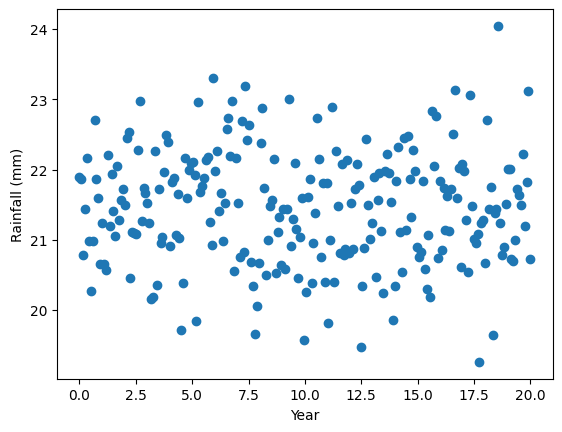

In [ ]:
yis = 20 + 0.05432 * x_temp + 0.004546 * x_nino + 0.0354 * x_slp
yis = yis + 0.8 * np.random.randn(len(yis))  # Adding normally distributed error

plt.figure(11)
plt.scatter(xis, yis)
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.show()

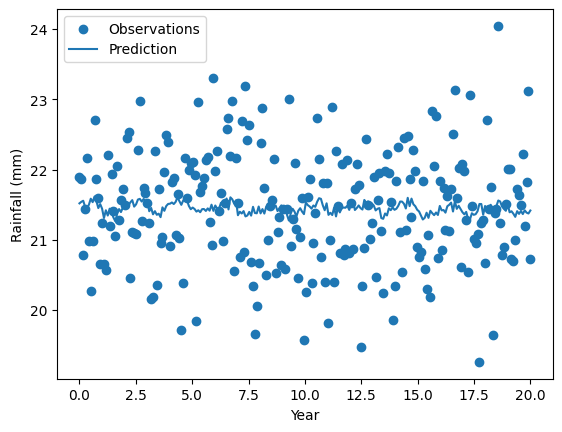

In [ ]:
# Multivariate Linear Regression
xlr = np.column_stack((np.ones(len(x_temp)), x_temp, x_nino, x_slp)) # put together our X matrix of predictors
ylr = yis # make sure our vector of responses y is oriented properly
b = np.linalg.lstsq(xlr, ylr, rcond=None)[0] # Use the numpy.linalg.lstsq function for multivariate linear regression (matrix inversion)
yhat = b[0] + b[1] * x_temp + b[2] * x_nino + b[3] * x_slp # calculate our estimates of the response y^

plt.figure(13)
plt.scatter(xis, yis, label='Observations')
plt.plot(xis, yhat, label='Prediction')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.legend(['Observations', 'Prediction'])
plt.show()

It's not a great fit, because our model isn't taking into account this noise. What do we do? We can't find a model that will account for random noise (unless we cant to consider stochastic models...but that's a separate topic). So what do we do? Maybe it doesn't work so well to assume the form of our model f...

### Turn to non-parametric methods
We won't go too far into non-parametric methods here, but let's try out one kind. Here, we are simply using a curve fitting tool to fit a spline (a function defined by a bunch of polynomials) to our data. Splines are considered one of the most "flexible" kinds of curves, in that they can fit to pretty much any dataset.

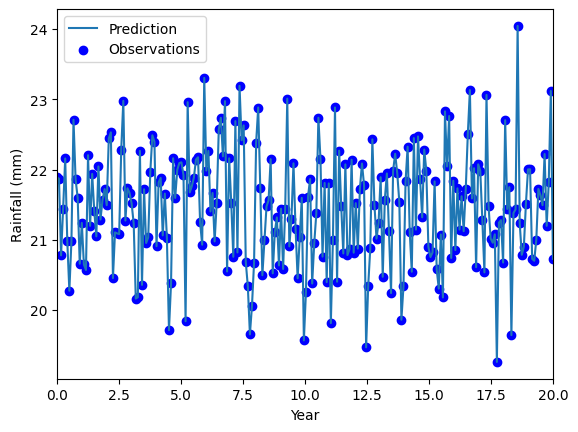

In [ ]:
spline = CubicSpline(xis, yis)

plt.figure(14)
plt.plot(xis, spline(xis))
plt.scatter(xis, yis, color='b')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.legend(['Prediction', 'Observations'])
plt.xlim(0, 20)
plt.show()

As you can see, the spline fits our data perfectly. That's awesome! Can we now use the spline to predict future rainfall?

### Which Model is Best?
Now that we've presented a few different models to represent our data, we need a way of quantitatively determining which model we should use. But what metric? There are a ton of metrics to compare different models against each other. Here, we will focus on one kind: mean-squared error.

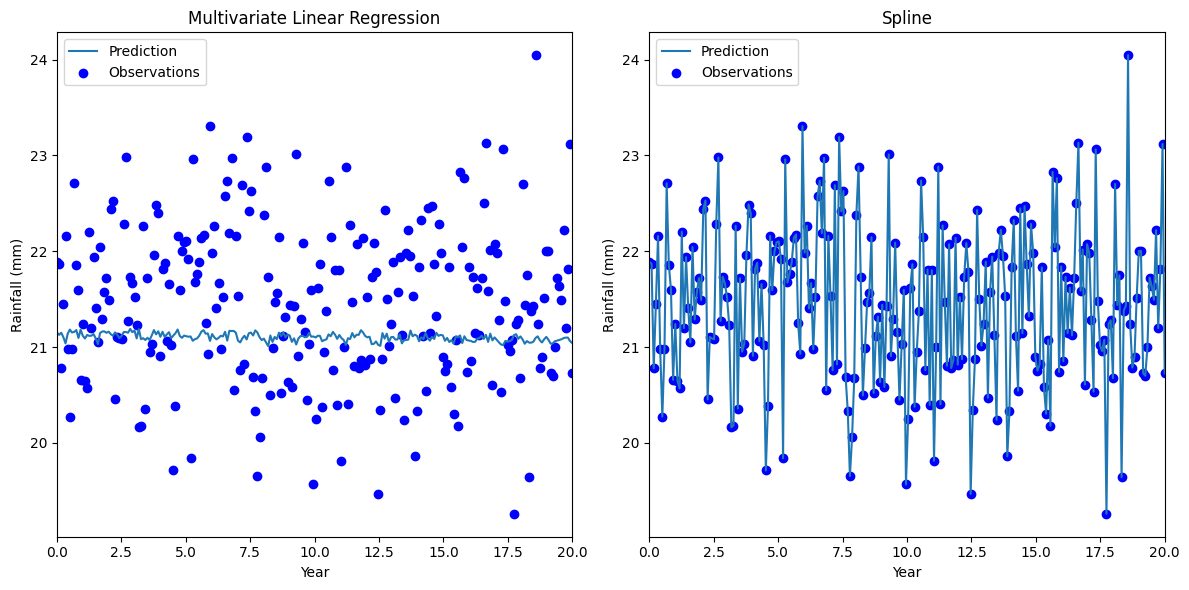

In [ ]:
# Calculate yhat for the spline and linear regression
yhat_spline = spline(xis)
yhat_linreg = b[0] + b[1] * x_temp

plt.figure(15, figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(xis, yhat_linreg)
plt.scatter(xis, yis, color='b')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.legend(['Prediction', 'Observations'])
plt.xlim(0, 20)
plt.title('Multivariate Linear Regression')

plt.subplot(1, 2, 2)
plt.plot(xis, yhat_spline)
plt.scatter(xis, yis, color='b')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.legend(['Prediction', 'Observations'])
plt.xlim(0, 20)
plt.title('Spline')

plt.tight_layout()
plt.show()


We may expect that the spline would fare better if we compare these outputs to observations. And you'd be right!

In [ ]:
# compare MSE of linear regression to spline fitting
mse_spline = np.sum((yis - yhat_spline)**2) / len(yis)
mse_linreg = np.sum((yis - yhat_linreg)**2) / len(yis)

print("MSE for Spline Fitting:", mse_spline)
print("MSE for Linear Regression:", mse_linreg)

MSE for Spline Fitting: 0.0
MSE for Linear Regression: 0.7829599974250436


The MSE of the spline is (at or near) 0 - it's a perfect fit to the data! Does this mean we should use the spline going forward?

Difference between training data and test data: this example illustrates the fundamental problem of trying to test our model using the same data we trained the model with. We call this MSE the train MSE - it will always favor the model that fits the training data the best, even if it is an overfitted model! It doesn't mean that if the model sees new data, the spline will work the best in that case.

Therefore, it's always best to use a new set of test data to test your models against. This way, we can avoid using models that are overfitted to our training data

In [ ]:
# Generate the test dataset
y_test = 20 + 0.05432 * x_temp + 0.004546 * x_nino + 0.0354 * x_slp
y_test = y_test + 0.8 * np.random.randn(len(y_test))

Now we'll compare the MSE of the spline and the linear regression against the test data.

In [ ]:
mse_spline_test = np.sum((y_test - yhat_spline)**2) / len(y_test)
mse_linreg_test = np.sum((y_test - yhat_linreg)**2) / len(y_test)

print("MSE for Spline Fitting (Test Data):", mse_spline_test)
print("MSE for Linear Regression (Test Data):", mse_linreg_test)

MSE for Spline Fitting (Test Data): 1.279220562434523
MSE for Linear Regression (Test Data): 0.7295539046599332


Using this new test dataset, the MSE of the linear regression is actually lower than that of the spline! In this case, we'd be better off using the linear regression model than the spline, even though the spline fit the training data so much better!

But still, the linear regression doesn't work that well...good thing that there are tons of other models we can choose from! For example, we can use a smoothing spline and it gives us an even better test MSE than the linear regression does!

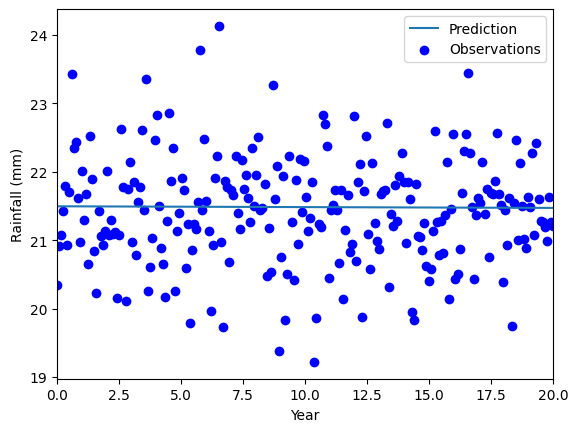

MSE for Smooth Spline (Training Data): 0.6226564807122167
MSE for Smooth Spline (Test Data): 0.6824382301888525


In [ ]:
# Fit a smooth spline to the data
spline = UnivariateSpline(xis, yis,k=2)

# Calculate yhat for the smooth spline
yhat_smoothspline = spline(xis)

plt.figure(16)
plt.plot(spline(xis))
plt.scatter(xis, yis, color='b')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.legend(['Prediction', 'Observations'])
plt.xlim(0, 20)

# Calculate the Mean Squared Error (MSE) for the smooth spline
mse_smoothspline = np.sum((yis - yhat_smoothspline)**2) / len(yis)

# Calculate the Mean Squared Error (MSE) for the smooth spline on the test data
mse_smoothspline_test = np.sum((y_test - yhat_smoothspline)**2) / len(yis)

plt.show()

print("MSE for Smooth Spline (Training Data):", mse_smoothspline)
print("MSE for Smooth Spline (Test Data):", mse_smoothspline_test)

This is an illustration of what we call the Bias-Variance Tradeoff: as our models get more flexible (e.g. the spline), the training MSE will decrease, but the test MSE may not because we're overfitting the data (the variance of our model increases), but as our model gets more restrictive, we get error that can be introduced by fundamentally using the wrong model. More flexible models will reduce bias, but will increase variance. More restrictive models will increase bias but reduce variance. We want to find some intermediate between the two that will give us the minimum variance and bias.

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


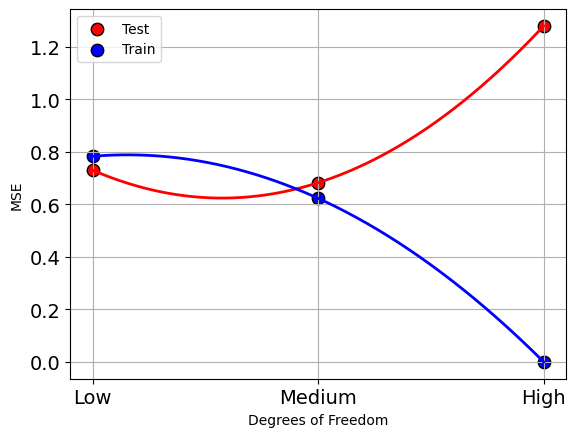

In [ ]:
mse_test = [mse_linreg_test, mse_smoothspline_test, mse_spline_test]
mse_train = [mse_linreg, mse_smoothspline, mse_spline]

def poly2(x, a, b, c):
    return a * x ** 2 + b * x + c

popt_test, _ = curve_fit(poly2, [1, 2, 3], mse_test)
popt_train, _ = curve_fit(poly2, [1, 2, 3], mse_train)

fit_mse_test = lambda x: poly2(x, *popt_test)
fit_mse_train = lambda x: poly2(x, *popt_train)

plt.figure(17)
xinterp = np.linspace(1, 3, 1000)

# Plot test MSE
plt.plot(xinterp, fit_mse_test(xinterp), color='r', linewidth=2)
plt.scatter([1, 2, 3], mse_test, s=80, c='r', marker='o', label='Test', edgecolors='k')

# Plot train MSE
plt.plot(xinterp, fit_mse_train(xinterp), color='b', linewidth=2)
plt.scatter([1, 2, 3], mse_train, s=80, c='b', marker='o', label='Train', edgecolors='k')

plt.xlabel('Degrees of Freedom')
plt.ylabel('MSE')
plt.legend(loc='best')
plt.grid(True)
plt.xticks([1, 2, 3], ['Low', 'Medium', 'High'])
plt.tick_params(axis='both', which='major', labelsize=14)

plt.show()

### If Time...A clearer example of the Bias-Variance Tradeoff

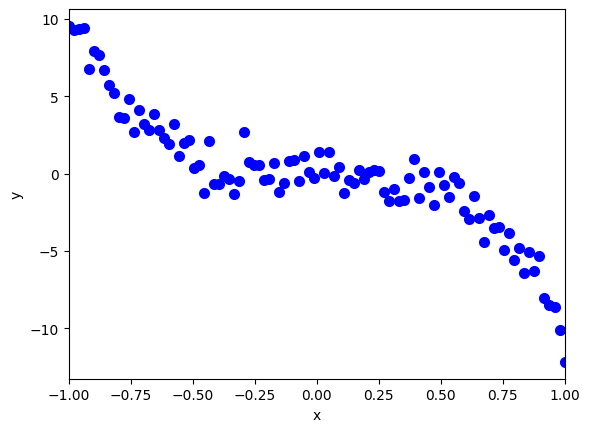

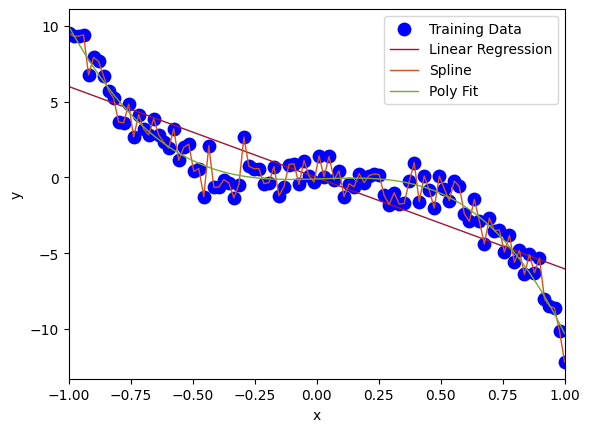

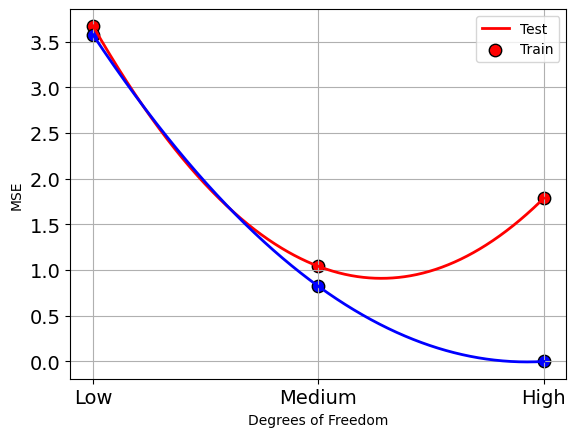

In [ ]:
# Generate x values
x = np.linspace(-1, 1, 100)

# Generate training data
y_train = 10 * (-x) ** 3 + 1 * np.random.randn(len(x))

# Create a figure for training data
plt.figure(17)
plt.scatter(x, y_train, color='b', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-1, 1)

# Linear regression
xlr = np.column_stack((np.ones(len(x)), x))
ylr = y_train
b = np.linalg.lstsq(xlr, ylr, rcond=None)[0]
yhat_lr = b[0] + b[1] * x

# Spline fit
spline = UnivariateSpline(x, y_train, s=0)
yhat_spline = spline(x)

# Smooth spline fit
def poly4(x, a, b, c, d, e):
    return a * x ** 4 + b * x ** 3 + c * x ** 2 + d * x + e

popt_poly4, _ = curve_fit(poly4, x, y_train)
yhat_poly = poly4(x, *popt_poly4)

# Create a figure for test data
plt.figure(18)
plt.scatter(x, y_train, s=80, color='b', linewidth=1)
plt.plot(x, yhat_lr, color=[0.6350, 0.0780, 0.1840], linewidth=1)
plt.plot(x, yhat_spline, color=[0.8500, 0.3250, 0.0980], linewidth=1)
plt.plot(x, yhat_poly, color=[0.4660, 0.6740, 0.1880], linewidth=1)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-1, 1)
plt.legend(['Training Data', 'Linear Regression', 'Spline', 'Poly Fit'])

# Calculate MSE for training data
mse_train_lr = np.sum((y_train - yhat_lr) ** 2) / len(y_train)
mse_train_spline = np.sum((y_train - yhat_spline) ** 2) / len(y_train)
mse_train_poly = np.sum((y_train - yhat_poly) ** 2) / len(y_train)

# Generate test data
y_test = 10 * (-x) ** 3 + 1 * np.random.randn(len(x))

# Calculate MSE for test data
mse_test_lr = np.sum((y_test - yhat_lr) ** 2) / len(y_test)
mse_test_spline = np.sum((y_test - yhat_spline) ** 2) / len(y_test)
mse_test_poly = np.sum((y_test - yhat_poly) ** 2) / len(y_test)

mse_test = [mse_test_lr, mse_test_poly, mse_test_spline]
mse_train = [mse_train_lr, mse_train_poly, mse_train_spline]

# Create polynomial fits for test and train MSE
def poly2(x, a, b, c):
    return a * x ** 2 + b * x + c

popt_test, _ = curve_fit(poly2, [1, 2, 3], mse_test)
popt_train, _ = curve_fit(poly2, [1, 2, 3], mse_train)

fit_mse_test = lambda x: poly2(x, *popt_test)
fit_mse_train = lambda x: poly2(x, *popt_train)

# Create a figure for MSE comparison
plt.figure(19)
xinterp = np.linspace(1, 3, 1000)
plt.plot(xinterp, fit_mse_test(xinterp), color='r', linewidth=2)
plt.scatter([1, 2, 3], mse_test, s=80, color='r', marker='o', label='Test', edgecolors='k')
plt.plot(xinterp, fit_mse_train(xinterp), color='b', linewidth=2)
plt.scatter([1, 2, 3], mse_train, s=80, color='b', marker='o', label='Train', edgecolors='k')
plt.xlabel('Degrees of Freedom')
plt.ylabel('MSE')
plt.legend(['Test', 'Train'])
plt.grid(True)
plt.xticks([1, 2, 3], ['Low', 'Medium', 'High'])
plt.tick_params(axis='both', which='major', labelsize=14)

# Show the plots
plt.show()